# Importando Bibliotecas

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregando Dataframe ficticío

In [2]:
path = r'C:\Users\gusta\Downloads\2-Sprint-IA\Dataframe\Customer-Churn.csv'

header = ['ID', 'Genêro', 'Idoso', 'Parceiro', 'Produto Omni CRM', 'Tempo de permanência em meses', 'Produto GEO', 'Telefone', 'Tipo Internet', 'Produto Hike', 'Produto MKT Suíte', 'Produto Trade', 'Produto InPaas', 'Produto Social', 'Produto AI', 'Tipo de Contrato', 'Produto Collection', 'Método de Pagamento', 'Encargos mensais', 'Encargos Totais', 'Churn']

df = pd.read_csv(path, header=None, names=header)

# Removendo e Reordenando as colunas

In [3]:
df = df.drop(0)

df = df.drop(['Genêro', 'Idoso', 'Telefone', 'Tipo Internet'], axis=1)

nova_ordem_col = ['ID', 'Parceiro', 'Tempo de permanência em meses', 'Produto Omni CRM', 'Produto GEO', 'Produto Hike', 'Produto MKT Suíte', 'Produto Trade', 'Produto InPaas', 'Produto Social', 'Produto AI',  'Produto Collection', 'Tipo de Contrato', 'Método de Pagamento', 'Encargos mensais', 'Encargos Totais', 'Churn']
df = df[nova_ordem_col]

# Apresentando as informações do Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 1 to 7043
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             7043 non-null   object
 1   Parceiro                       7043 non-null   object
 2   Tempo de permanência em meses  7043 non-null   object
 3   Produto Omni CRM               7043 non-null   object
 4   Produto GEO                    7043 non-null   object
 5   Produto Hike                   7043 non-null   object
 6   Produto MKT Suíte              7043 non-null   object
 7   Produto Trade                  7043 non-null   object
 8   Produto InPaas                 7043 non-null   object
 9   Produto Social                 7043 non-null   object
 10  Produto AI                     7043 non-null   object
 11  Produto Collection             7043 non-null   object
 12  Tipo de Contrato               7043 non-null   object
 13  Mét

# Apresentando o tamanho do Dataframe

In [5]:
df.shape

(7043, 17)

# Checando valores ausentes

In [6]:
df.isnull().sum()

ID                               0
Parceiro                         0
Tempo de permanência em meses    0
Produto Omni CRM                 0
Produto GEO                      0
Produto Hike                     0
Produto MKT Suíte                0
Produto Trade                    0
Produto InPaas                   0
Produto Social                   0
Produto AI                       0
Produto Collection               0
Tipo de Contrato                 0
Método de Pagamento              0
Encargos mensais                 0
Encargos Totais                  0
Churn                            0
dtype: int64

# Transformando dados 

In [7]:
df = df.replace("Yes", 1).infer_objects(copy=False)
df = df.replace("No", 0).infer_objects(copy=False)
df = df.replace("No internet service", 0).infer_objects(copy=False)

C:\Users\gusta\AppData\Local\Temp\ipykernel_3228\2371359694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("No", 0).infer_objects(copy=False)
C:\Users\gusta\AppData\Local\Temp\ipykernel_3228\2371359694.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("No internet service", 0).infer_objects(copy=False)


# Plotando gráficos exploratórios

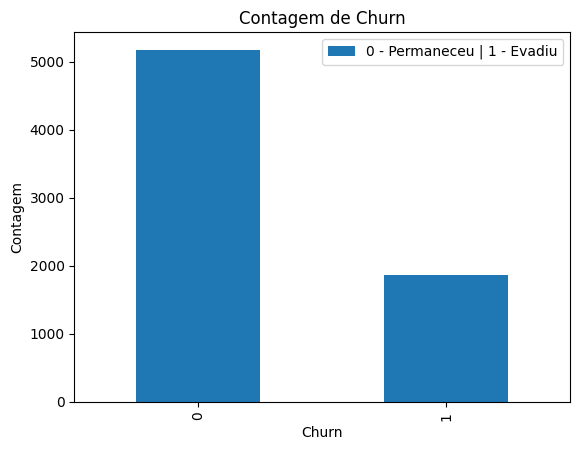

In [8]:
churn_count = df['Churn'].value_counts()
churn_count.plot(kind='bar')

plt.title('Contagem de Churn')
plt.legend(["0 - Permaneceu | 1 - Evadiu"], loc="upper right")
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()

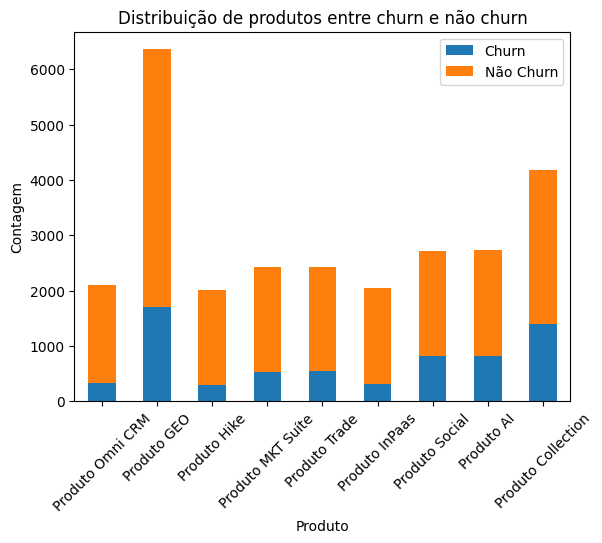

In [9]:
produtos = ['Produto Omni CRM', 'Produto GEO', 'Produto Hike', 'Produto MKT Suíte', 'Produto Trade',
            'Produto InPaas', 'Produto Social', 'Produto AI', 'Produto Collection']
produtos_churn = df[df['Churn'] == 1][produtos].sum()
produtos_nao_churn = df[df['Churn'] == 0][produtos].sum()
produtos_df = pd.DataFrame({'Churn': produtos_churn, 'Não Churn': produtos_nao_churn})
produtos_df.plot(kind='bar', stacked=True)
plt.title('Distribuição de produtos entre churn e não churn')
plt.xlabel('Produto')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

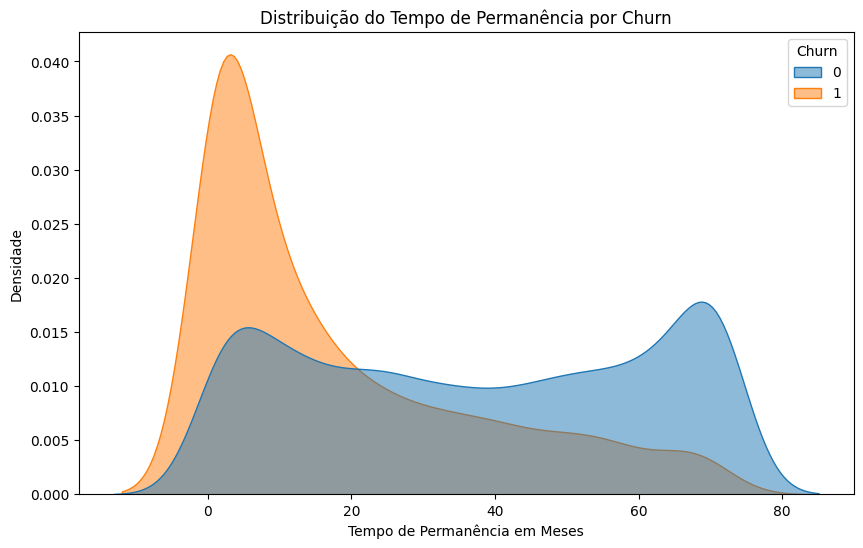

In [10]:
df['Tempo de permanência em meses'] = df['Tempo de permanência em meses'].astype(float)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Tempo de permanência em meses', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribuição do Tempo de Permanência por Churn')
plt.xlabel('Tempo de Permanência em Meses')
plt.ylabel('Densidade')
plt.show()

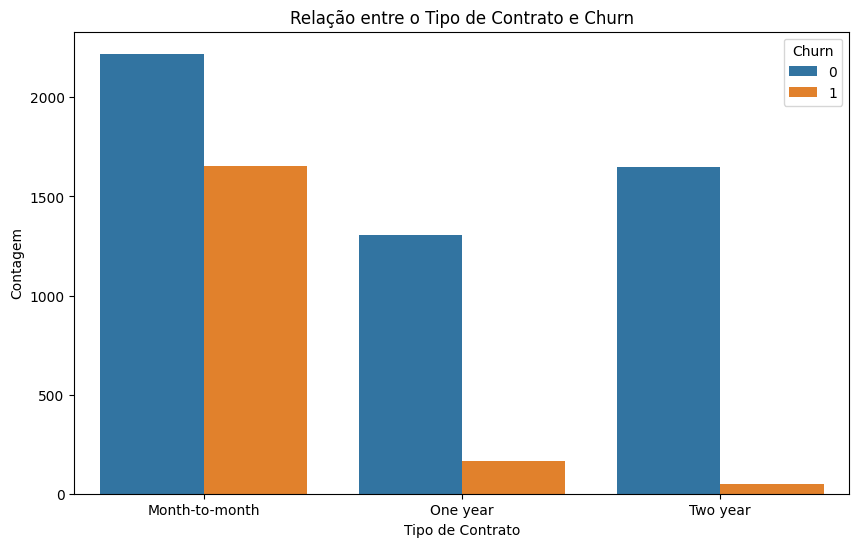

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo de Contrato', hue='Churn')
plt.title('Relação entre o Tipo de Contrato e Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

# Utilizando Label Encoder para tranformar as colunas Não numéricas

In [12]:
label_encoder = LabelEncoder()

df['Tipo de Contrato'] = label_encoder.fit_transform(df['Tipo de Contrato'])
df['Método de Pagamento'] = label_encoder.fit_transform(df['Método de Pagamento'])

# Apresentando as 10 primeiras linhas de dados

In [13]:
df.head(10)

,ID,Parceiro,Tempo de permanência em meses,Produto Omni CRM,Produto GEO,Produto Hike,Produto MKT Suíte,Produto Trade,Produto InPaas,Produto Social,Produto AI,Produto Collection,Tipo de Contrato,Método de Pagamento,Encargos mensais,Encargos Totais,Churn
1,7590-VHVEG,1,1.0,0,0,0,1,0,0,0,0,1,0,2,29.85,29.85,0
2,5575-GNVDE,0,34.0,0,1,1,0,1,0,0,0,0,1,3,56.95,1889.5,0
3,3668-QPYBK,0,2.0,0,1,1,1,0,0,0,0,1,0,3,53.85,108.15,1
4,7795-CFOCW,0,45.0,0,0,1,0,1,1,0,0,0,1,0,42.3,1840.75,0
5,9237-HQITU,0,2.0,0,1,0,0,0,0,0,0,1,0,2,70.7,151.65,1
6,9305-CDSKC,0,8.0,0,1,0,0,1,0,1,1,1,0,2,99.65,820.5,1
7,1452-KIOVK,0,22.0,1,1,0,1,0,0,1,0,1,0,1,89.1,1949.4,0
8,6713-OKOMC,0,10.0,0,0,1,0,0,0,0,0,0,0,3,29.75,301.9,0
9,7892-POOKP,1,28.0,0,1,0,0,1,1,1,1,1,0,2,104.8,3046.05,1
10,6388-TABGU,0,62.0,1,1,1,1,0,0,0,0,0,1,0,56.15,3487.95,0


# Apresentando as 10 ultimas linhas 

In [14]:
df.tail(10)

,ID,Parceiro,Tempo de permanência em meses,Produto Omni CRM,Produto GEO,Produto Hike,Produto MKT Suíte,Produto Trade,Produto InPaas,Produto Social,Produto AI,Produto Collection,Tipo de Contrato,Método de Pagamento,Encargos mensais,Encargos Totais,Churn
7034,9767-FFLEM,0,38.0,0,1,0,0,0,0,0,0,1,0,1,69.5,2625.25,0
7035,0639-TSIQW,0,67.0,0,1,1,1,1,0,1,0,1,0,1,102.95,6886.25,1
7036,8456-QDAVC,0,19.0,0,1,0,0,0,0,1,0,1,0,0,78.7,1495.1,0
7037,7750-EYXWZ,0,12.0,0,0,0,1,1,1,1,1,0,1,2,60.65,743.3,0
7038,2569-WGERO,0,72.0,0,1,0,0,0,0,0,0,1,2,0,21.15,1419.4,0
7039,6840-RESVB,1,24.0,1,1,1,0,1,1,1,1,1,1,3,84.8,1990.5,0
7040,2234-XADUH,1,72.0,1,1,0,1,1,0,1,1,1,1,1,103.2,7362.9,0
7041,4801-JZAZL,1,11.0,1,0,1,0,0,0,0,0,1,0,2,29.6,346.45,0
7042,8361-LTMKD,1,4.0,0,1,0,0,0,0,0,0,1,0,3,74.4,306.6,1
7043,3186-AJIEK,0,66.0,0,1,1,0,1,1,1,1,1,2,0,105.65,6844.5,0


# Plotando Matriz de correlação com variáveis numéricas contínuas e variável alvo

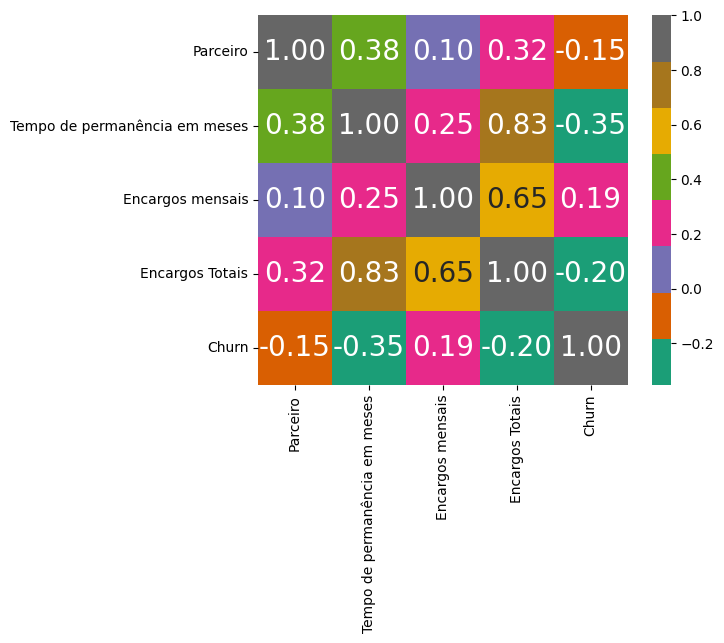

In [15]:
cols = ['Parceiro', 'Tempo de permanência em meses', 'Encargos mensais','Encargos Totais', 'Churn']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
corr_matx = df[cols].corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 20},yticklabels=cols,xticklabels=cols,cmap='Dark2')

# Plotando Matriz de correlação com variáveis binárias e variável alvo

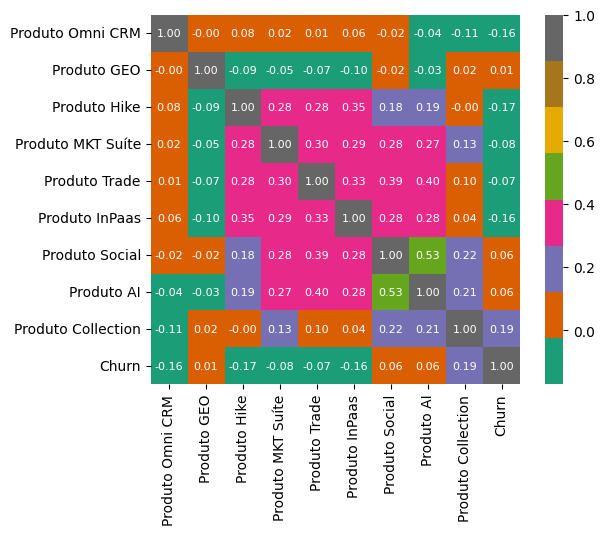

In [16]:
cols = ['Produto Omni CRM', 'Produto GEO', 'Produto Hike', 'Produto MKT Suíte', 'Produto Trade', 'Produto InPaas', 'Produto Social', 'Produto AI',  'Produto Collection', 'Churn']
corr_matx = df[cols].corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 8},yticklabels=cols,xticklabels=cols,cmap='Dark2')

# Dividindo a base para treino e teste em 35%

In [17]:
df.dropna(subset=["Encargos Totais"], inplace=True)

entradas = df[['Parceiro', 'Tempo de permanência em meses', 'Produto Omni CRM', 'Produto GEO', 'Produto Hike', 'Produto MKT Suíte', 'Produto Trade', 'Produto InPaas', 'Produto Social', 'Produto AI',  'Produto Collection', 'Tipo de Contrato', 'Método de Pagamento', 'Encargos mensais', 'Encargos Totais']]
classes = df['Churn']

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas,classes,test_size=0.35)

# Treinamento do modelo de regressão logística

In [18]:
model = LogisticRegression(max_iter=2000)
model.fit(entradas_treino, classes_treino)

LogisticRegression(max_iter=2000)

# Previsões com os dados de teste

In [19]:
y_pred = model.predict(entradas_teste)
print(y_pred)

[1 0 0 ... 0 0 0]


# Medindo acurácia do modelo de Regressão Logística

In [21]:
accuracy = accuracy_score(classes_teste, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.8046303818034118


# Treinando modelo KNN

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=9)

# Realizando previsões com o modelo KNN

In [28]:
y_pred_knn = knn_model.predict(entradas_teste)
print(y_pred)

[1 0 0 ... 0 0 0]


# Acurácia do modelo KNN

In [29]:
accuracy_knn = accuracy_score(classes_teste, y_pred_knn)
print("Acurácia do modelo KNN:", accuracy_knn)

Acurácia do modelo KNN: 0.7753858651502843
